In [2]:
!pip install tensorflow --upgrade
import tensorflow as tf
print(tf.__version__)


   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   - -------------------------------------- 13.6/332.0 MB 72.5 MB/s eta 0:00:05
   -- ------------------------------------- 24.4/332.0 MB 62.8 MB/s eta 0:00:05
   ---- ----------------------------------- 35.4/332.0 MB 59.5 MB/s eta 0:00:05
   ----- ---------------------------------- 44.8/332.0 MB 56.4 MB/s eta 0:00:06
   ------ --------------------------------- 55.6/332.0 MB 55.8 MB/s eta 0:00:05
   -------- ------------------------------- 70.0/332.0 MB 58.5 MB/s eta 0:00:05
   ---------- ----------------------------- 83.4/332.0 MB 59.5 MB/s eta 0:00:05
   ----------- ---------------------------- 95.4/332.0 MB 59.5 MB/s eta 0:00:04
   ------------ -------------------------- 109.8/332.0 MB 60.8 MB/s eta 0:00:04
   -------------- ------------------------ 124.5/332.0 MB 61.7 MB/s eta 0:00:04
   ---------------- ---------------------- 137.9/332.0 MB 62.2 MB/s eta 0:00:04
   ----------------- --------------------- 151.8/

In [3]:
# MNIST Digit Classification with a Feedforward Neural Net
# Framework: TensorFlow / Keras
# Author: Kyle Kitching


import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [4]:
# 1. Data Loading

# Load the MNIST dataset from Keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Train images shape:", x_train.shape)
print("Train labels shape:", y_train.shape)
print("Test images shape:", x_test.shape)
print("Test labels shape:", y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [5]:
# 2. Pre-processing / Data Preparation

# Making pixel values to the range [0, 1]
# Original images are 28x28 with pixel values 0-255
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten the 28x28 images into 784-dimensional vectors
# (num_samples, 28, 28) -> (num_samples, 784)
x_train = x_train.reshape((-1, 28 * 28))
x_test = x_test.reshape((-1, 28 * 28))

print("Flattened train shape:", x_train.shape)
print("Flattened test shape:", x_test.shape)

# One-hot encode the labels (0-9)
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

print("One-hot encoded train labels shape:", y_train_cat.shape)
print("One-hot encoded test labels shape:", y_test_cat.shape)


Flattened train shape: (60000, 784)
Flattened test shape: (10000, 784)
One-hot encoded train labels shape: (60000, 10)
One-hot encoded test labels shape: (10000, 10)


In [6]:
# 3. Model Definition / Architecture

model = models.Sequential([
    # Input layer of size 784
    layers.Input(shape=(784,)),

    # Hidden layer 1 (e.g., 128 neurons, ReLU activation)
    layers.Dense(128, activation="relu"),

    # Hidden layer 2 (optional, also ReLU)
    layers.Dense(64, activation="relu"),

    # Output layer: 10 neurons (for 10 classes) with Softmax
    layers.Dense(num_classes, activation="softmax")
])


model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# 4. Model Compilation


# Use Categorical Cross-Entropy loss and Adam optimizer
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)


In [8]:
# 5. Model Training

# Train for 5–10 epochs; you can adjust if needed
epochs = 10
batch_size = 128

history = model.fit(
    x_train,
    y_train_cat,
    validation_split=0.1,  # Use 10% of training for validation
    epochs=epochs,
    batch_size=batch_size,
    verbose=2
)


Epoch 1/10
422/422 - 3s - 7ms/step - accuracy: 0.9024 - loss: 0.3493 - val_accuracy: 0.9602 - val_loss: 0.1405
Epoch 2/10
422/422 - 2s - 5ms/step - accuracy: 0.9584 - loss: 0.1414 - val_accuracy: 0.9695 - val_loss: 0.1033
Epoch 3/10
422/422 - 2s - 6ms/step - accuracy: 0.9694 - loss: 0.0987 - val_accuracy: 0.9728 - val_loss: 0.0920
Epoch 4/10
422/422 - 3s - 6ms/step - accuracy: 0.9767 - loss: 0.0765 - val_accuracy: 0.9733 - val_loss: 0.0917
Epoch 5/10
422/422 - 1s - 3ms/step - accuracy: 0.9819 - loss: 0.0589 - val_accuracy: 0.9762 - val_loss: 0.0804
Epoch 6/10
422/422 - 3s - 6ms/step - accuracy: 0.9852 - loss: 0.0473 - val_accuracy: 0.9758 - val_loss: 0.0813
Epoch 7/10
422/422 - 3s - 6ms/step - accuracy: 0.9875 - loss: 0.0400 - val_accuracy: 0.9747 - val_loss: 0.0863
Epoch 8/10
422/422 - 3s - 6ms/step - accuracy: 0.9903 - loss: 0.0319 - val_accuracy: 0.9748 - val_loss: 0.0917
Epoch 9/10
422/422 - 1s - 3ms/step - accuracy: 0.9924 - loss: 0.0266 - val_accuracy: 0.9787 - val_loss: 0.0811
E

In [9]:
# 6. Final Evaluation on Test Set

test_loss, test_accuracy = model.evaluate(x_test, y_test_cat, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Loss: 0.0750
Test Accuracy: 0.9777


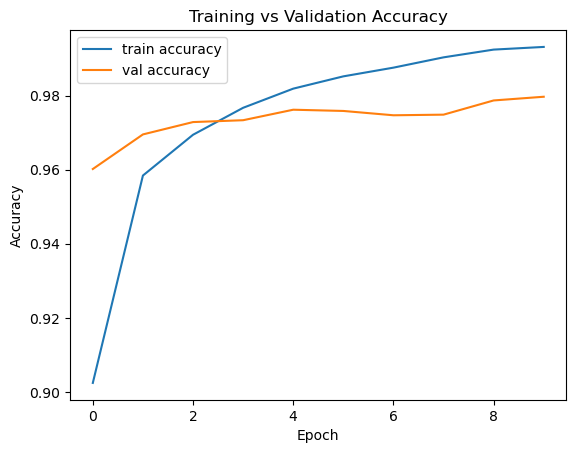

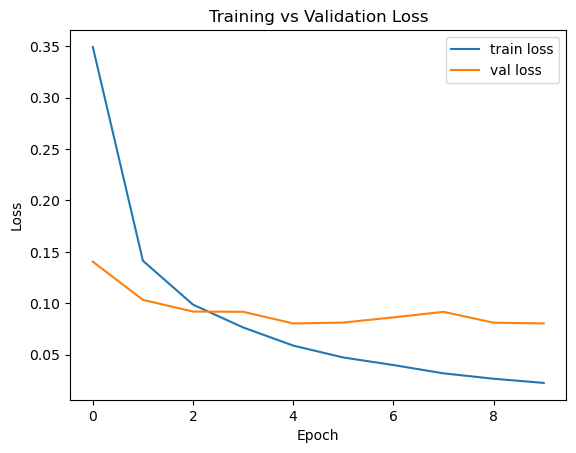

In [10]:
# 7. Plot Training History 

plt.figure()
plt.plot(history.history["accuracy"], label="train accuracy")
plt.plot(history.history["val_accuracy"], label="val accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
True label:      4
Predicted label: 4


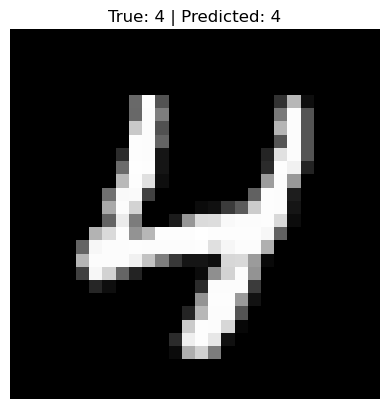

In [11]:
# 8. Single Test Image Prediction

# Pick a random index from the test set
idx = np.random.randint(0, x_test.shape[0])

# Get the corresponding original image (for plotting)
# Need to reshape back to 28x28
image = x_test[idx].reshape(28, 28)

true_label = y_test[idx]

# Model expects input as (1, 784)
input_vector = x_test[idx].reshape(1, 784)

# Predict probabilities
pred_probs = model.predict(input_vector)
predicted_label = np.argmax(pred_probs)

print(f"True label:      {true_label}")
print(f"Predicted label: {predicted_label}")

# Show the image
plt.imshow(image, cmap="gray")
plt.title(f"True: {true_label} | Predicted: {predicted_label}")
plt.axis("off")
plt.show()
